In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.business_analysis import get_plague_crops, get_plagues
from utils.business_analysis import get_crops, get_tuples, get_grouped_tuples

## Plague-Crop

In [3]:
plague_crops = get_plague_crops()

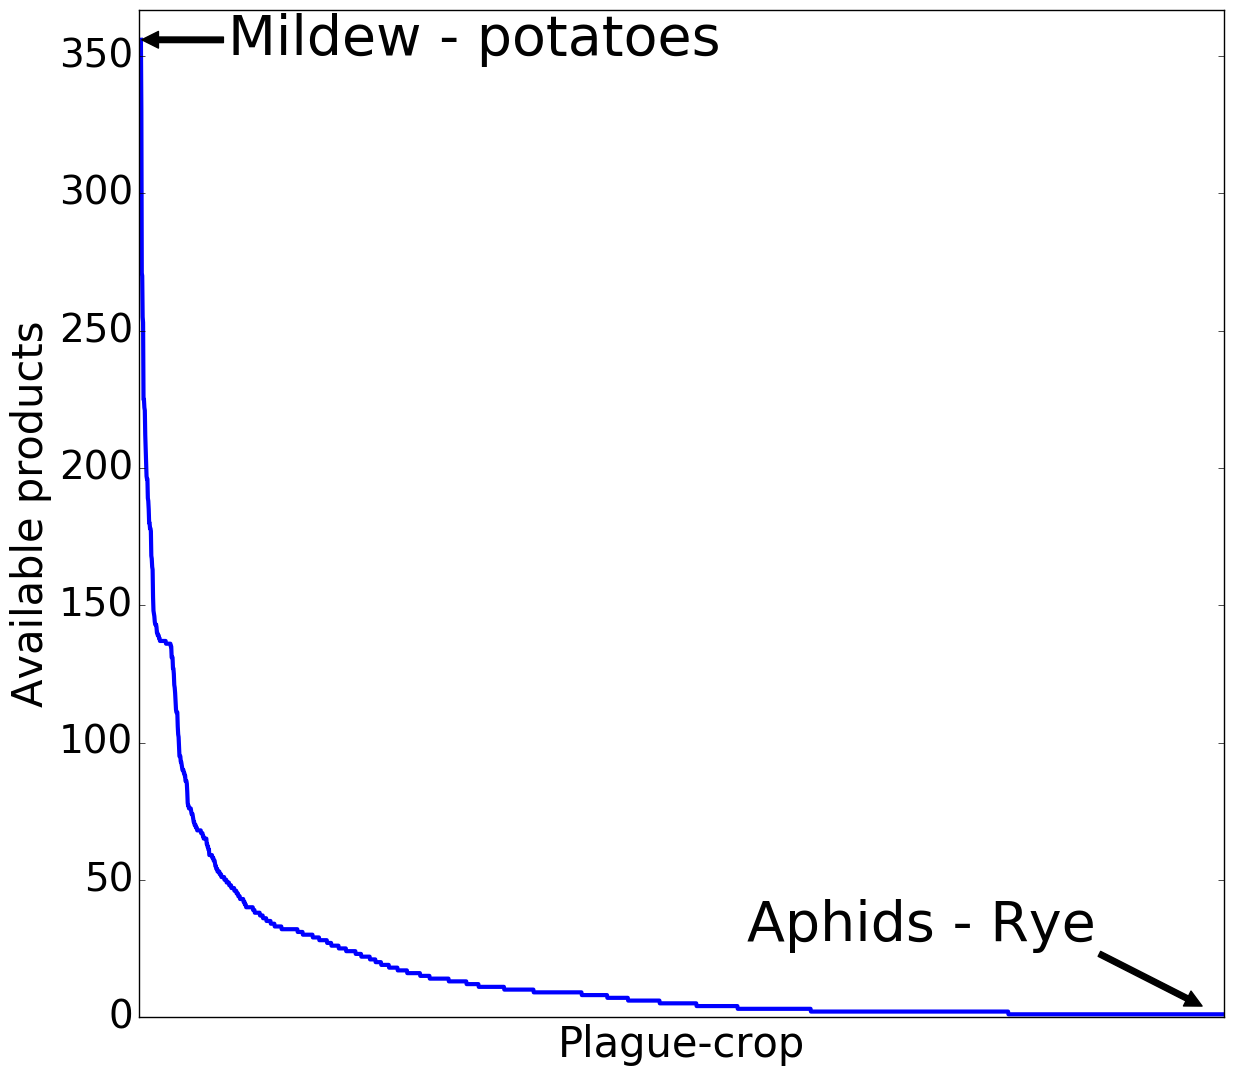

In [5]:
plague_crops.plot(figsize=(14,13), legend = False)
plt.xlim([-5,2500])
plt.ylim([0,367])
plt.style.use('paper.mplstyle')
plt.xlabel("Plague-crop")
plt.xticks([])
plt.ylabel("Available products")
plt.annotate('Mildew - potatoes', xy=(0, 356), xytext=(200, 350.5),
             fontsize = 40,
            arrowprops=dict(facecolor='black', shrink=0.01),
            )
plt.annotate('Aphids - Rye', xy=(2450, 4), xytext=(1400, 28),
             fontsize = 40,
            arrowprops=dict(facecolor='black', shrink=1.01),
            )
plt.savefig('../images/distribution-plague-product.png')
plt.show()

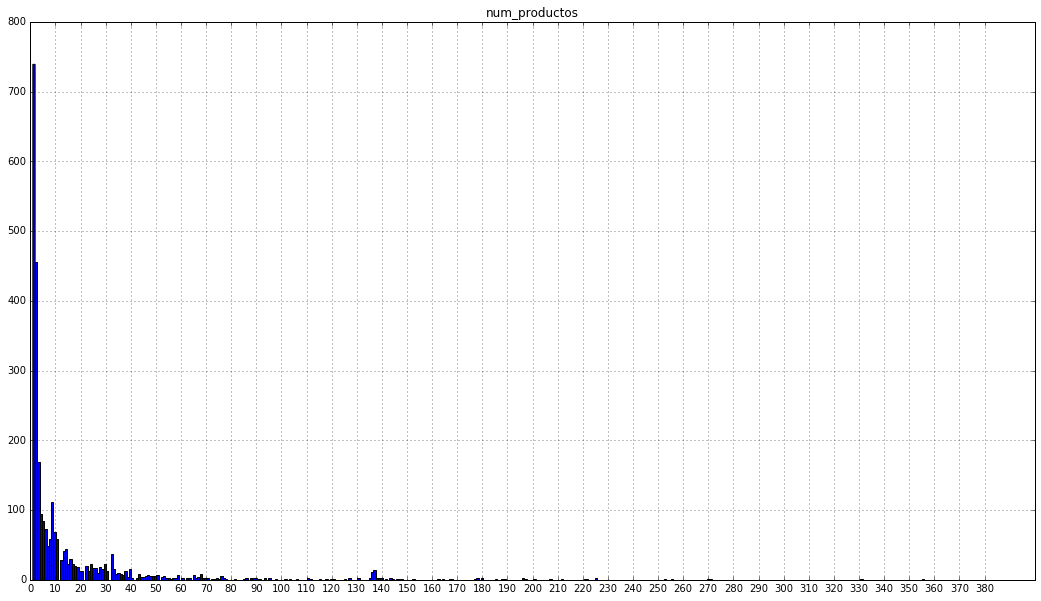

In [38]:
plague_crops.hist(figsize=(18,10), bins=390)
plt.xticks(np.arange(0,390,10))
plt.show()

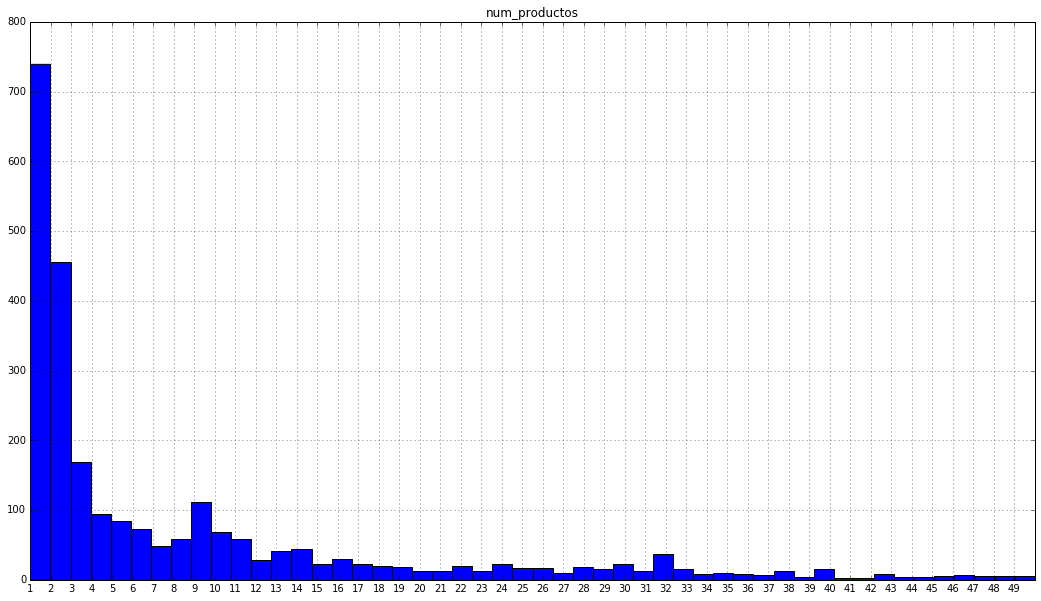

In [7]:
granularity = 50
plague_crops.loc[plague_crops["num_productos"] <= granularity].hist(figsize=(18,10), bins=granularity)
plt.xlim([1, granularity])
plt.xticks(np.arange(1,granularity,1))
plt.show()

## Plagues

In [40]:
plagues = get_plagues()

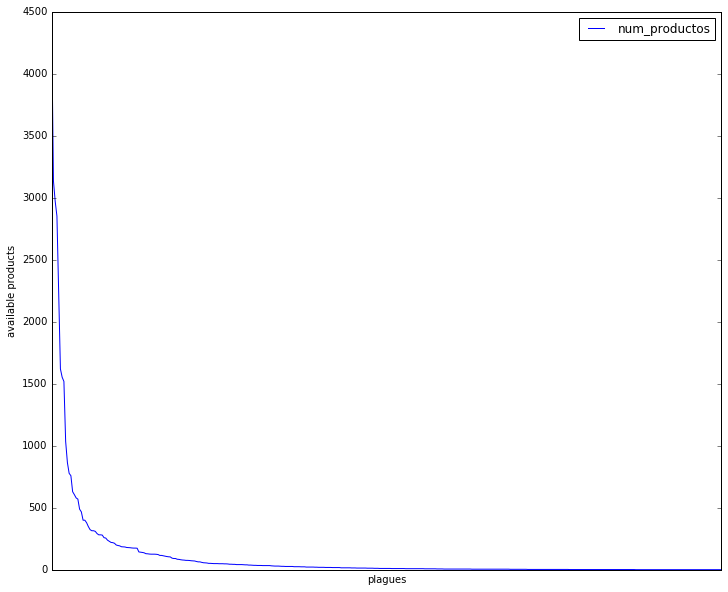

In [43]:
plagues.plot(figsize=(12,10))
#plt.xlim([-5,2500])
plt.xticks(())
plt.xlabel("plagues")
plt.ylabel("available products")
plt.show()

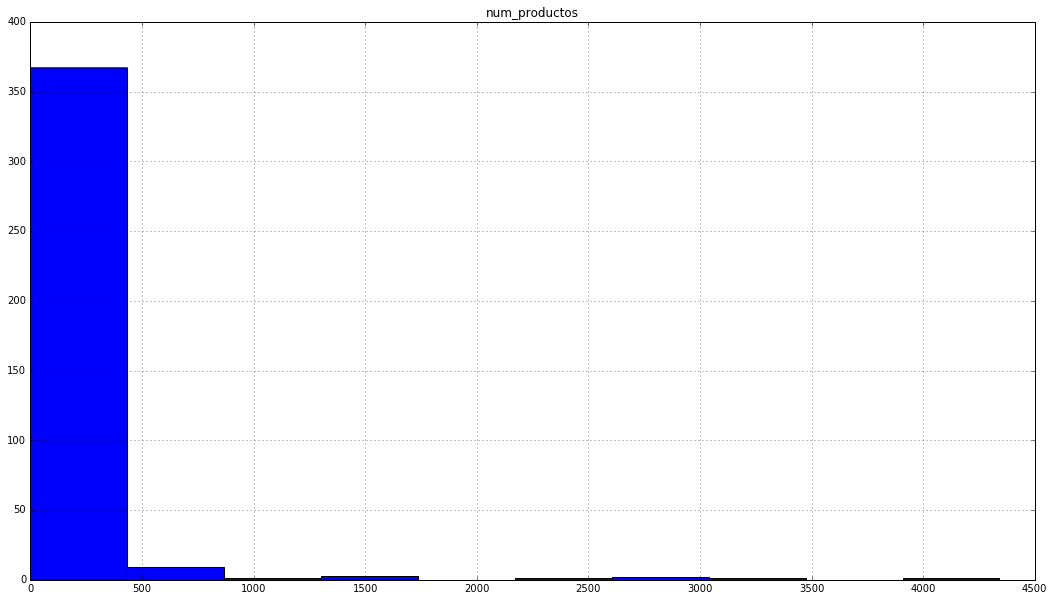

In [9]:
plagues.hist(figsize=(18,10)) #, bins=30)
#plt.xticks(np.arange(0,400,10))
plt.show()

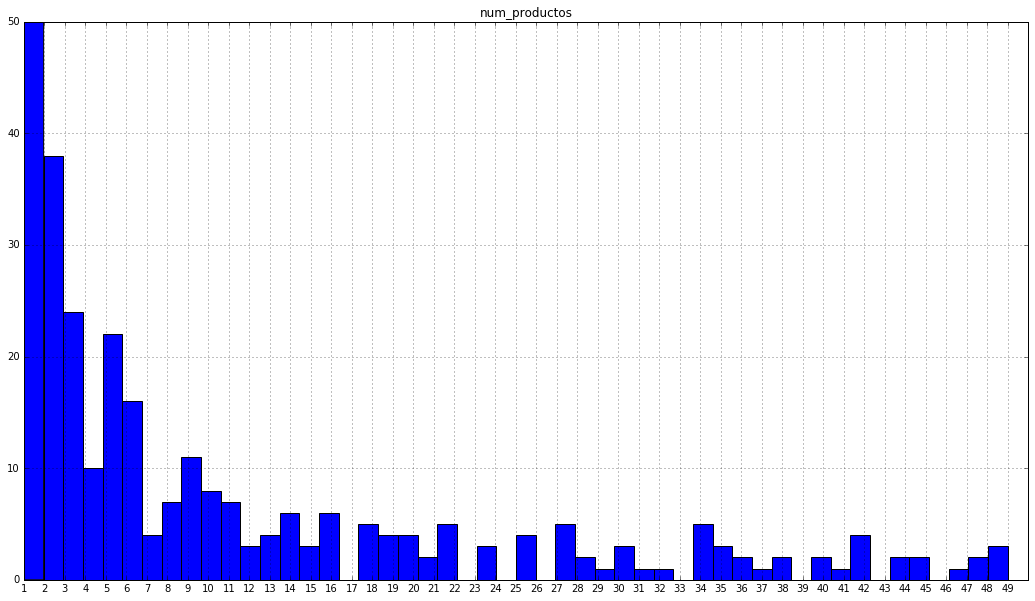

In [16]:
plagues.loc[plagues["num_productos"] < 50].hist(figsize=(18,10), bins=50)
plt.xticks(np.arange(0,50,1))
plt.xlim([1, 50])
plt.show()

## Crops

In [44]:
crops = get_crops()

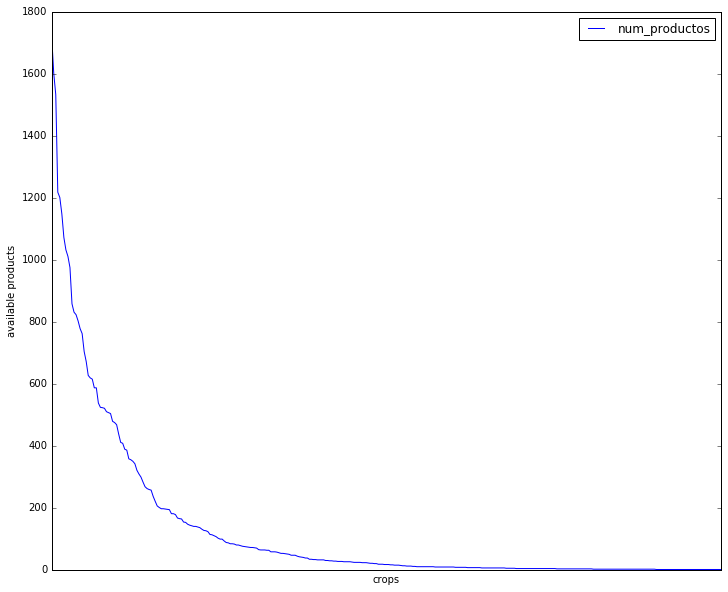

In [46]:
crops.plot(figsize=(12,10))
#plt.xlim([-5,2500])
plt.xticks(())
plt.xlabel("crops")
plt.ylabel("available products")
plt.show()

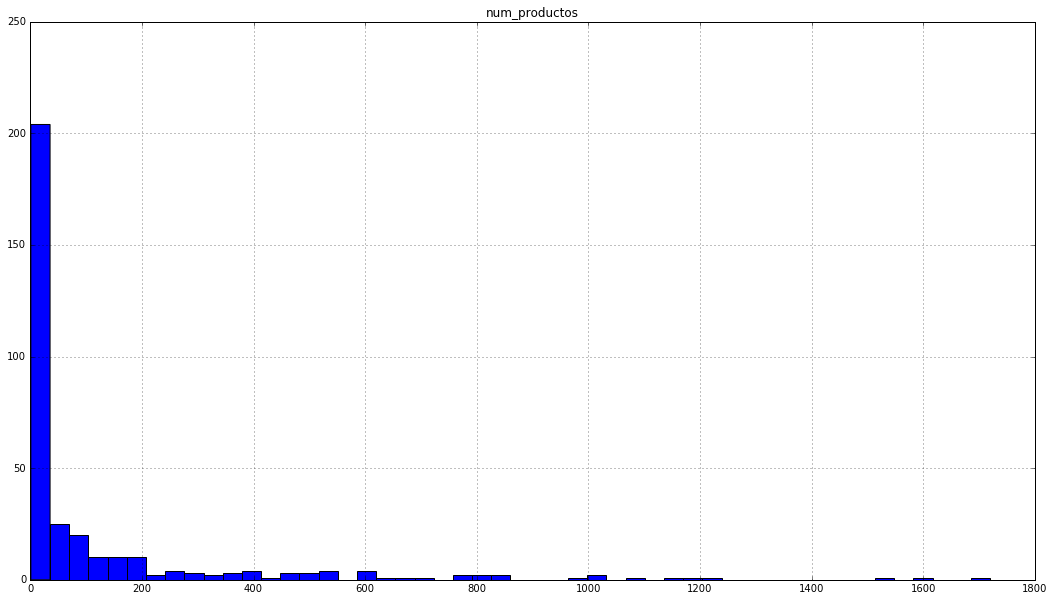

In [18]:
crops.hist(figsize=(18,10), bins=50)
#plt.xticks(np.arange(0,50,1))
plt.show()

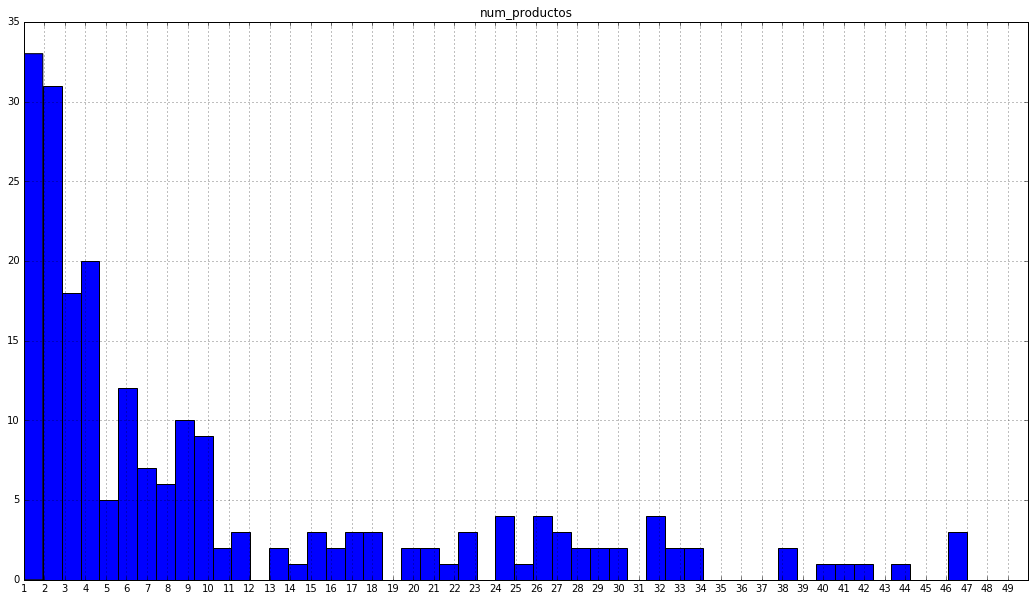

In [19]:
crops.loc[crops["num_productos"] < 50].hist(figsize=(18,10), bins=50)
plt.xticks(np.arange(0,50,1))
plt.xlim([1, 50])
plt.show()

In [8]:
original_tuples = get_tuples()
gts = get_grouped_tuples()

In [9]:
ratios = {}
for precision in [0.0025, 0.005,0.01, 0.05, 0.1, 0.56, 0.65]:
    ratios[str(precision)] = []
    for ex in range(30):
        tuples = get_tuples()
        tuples = [x for x in tuples]

        risk = 0
        number_of_removes = int(len(tuples) * precision)

        for i in range(number_of_removes):
            remove = np.random.randint(1, len(tuples)-1)
            removed = tuples[remove]
            if tuples[remove + 1] != removed and tuples[remove - 1] != removed:
                risk+=1
            del tuples[remove]
    #print(risk)
        ratios[str(precision)].append((risk/len(gts) * 100))

In [10]:
print(np.mean(np.array(ratios[str(0.0025)])), "%")
print(np.mean(np.array(ratios[str(0.005)])), "%")
print(np.mean(np.array(ratios[str(0.01)])), "%")
print(np.mean(np.array(ratios[str(0.05)])), "%")
print(np.mean(np.array(ratios[str(0.1)])), "%")
print(np.mean(np.array(ratios[str(0.56)])), "%")
print(np.mean(np.array(ratios[str(0.65)])), "%")

0.0753707755896 %
0.131291028446 %
0.244347191831 %
1.41502552881 %
2.95040116703 %
21.9936785801 %
27.7121322636 %


In [15]:
(len(tuples)/len(original_tuples)) * 100

44.0014164305949

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

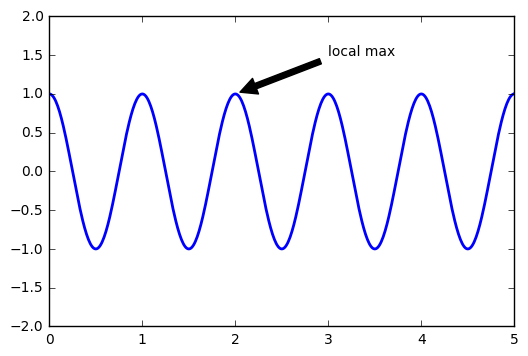

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,2)
plt.show()